### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?

In [1]:
lista_alumnos = [["Pedro", 47, 1.80],
                 ["Tomás", 31, 1.80],
                 ["Ana", 39, 1.65],
                 ["Natalio", 29, 1.73],
                 ["Monica", 47, 1.73],
                 ["Jose", 24, 1.75],
                 ["Carolina", 34, 1.64],
                 ["Alberto", 36, 1.60],
                 ["Cristina", 46, 1.70],
                 ["Alba", 29, 1.68],
                 ["Laura", 40, 1.60],
                 ["Luis", 47, 1.69],
                 ["Jaime", 38, 1.60],
                 ["Fernando", 51, 1.75]]

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
#Creamos el dataset

df = pd.DataFrame(lista_alumnos, columns=['Name', 'Age', 'Height'])
df.head()

,Name,Age,Height
0,Pedro,47,1.80
1,Tomás,31,1.80
2,Ana,39,1.65
3,Natalio,29,1.73
4,Monica,47,1.73


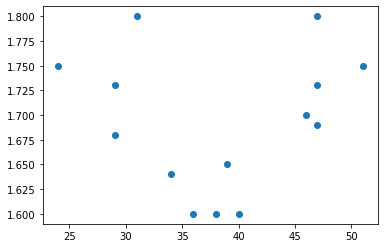

In [6]:
import matplotlib.pyplot as plt

#Comprobamos la distribución de los datos
plt.scatter(df['Age'], df['Height']);

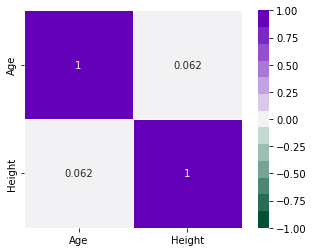

In [46]:
#Comprobamos la correlación de los datos

sns.heatmap(df.corr(),
           vmin = -1,
           vmax = 1,
           annot=True,
           square = True,
           linewidths = .5,
           cmap=sns.diverging_palette(150, 277, s=100, l=30, n=13));

In [12]:
#Dividimos los datos

from sklearn.model_selection import train_test_split

X = df['Height']
y = df['Age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [13]:
#Convertimos de una matriz (1X9) a (9X1)

X_train = X_train.values.reshape(-1, 1)

In [14]:
#Creamos un objeto de Regresion lineal y entrenamos el modelo

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [15]:
print(lm.intercept_, lm.coef_)

64.75515560554933 [-16.21672291]


In [16]:
X_test = X_test.values.reshape(-1, 1)
X_test

array([[1.8 ],
       [1.7 ],
       [1.64]])

In [50]:
#Calculamos los errores

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 8.245701357466064
MSE: 91.57327910976433
RMSE: 9.569392828688994
